In [97]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 326.1 kB/s eta 0:00:00


In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [85]:
tweets = pd.read_csv('tweets/crypto_10k_tweets_(2021_2022Nov).csv', lineterminator='\n',parse_dates=True).drop('Unnamed: 0', axis=1)
tweets.head()

,Date,Username,Content,URL,Hashtags\r
0,2022-11-30 11:53:21+00:00,0xEthereumYoda,#Ethereum price update: \n\n#ETH $1269.23 USD\...,https://twitter.com/0xEthereumYoda/status/1597...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin..."
1,2022-11-30 11:53:21+00:00,Lawrenc32984128,@mtmalinen @ecb Do well to understand that eve...,https://twitter.com/Lawrenc32984128/status/159...,['BTC']\r
2,2022-11-30 11:53:21+00:00,NITESHP55784410,Kayla #Ethereum Harold #世界杯 Egbert #百家乐 Lavern...,https://twitter.com/NITESHP55784410/status/159...,"['Ethereum', '世界杯', '百家乐', '世界杯买球']\r"
3,2022-11-30 11:53:20+00:00,817coin,#Bitcoin https://t.co/2koLlCvCri https://t.co/...,https://twitter.com/817coin/status/15979217174...,['Bitcoin']\r
4,2022-11-30 11:53:18+00:00,slamtoken,"Yesterday we made a 3,000 SLAM buyback and loc...",https://twitter.com/slamtoken/status/159792171...,"['slamtoken', 'bnb', 'bsc']\r"


In [86]:
tweets.head()

,Date,Username,Content,URL,Hashtags\r
0,2022-11-30 11:53:21+00:00,0xEthereumYoda,#Ethereum price update: \n\n#ETH $1269.23 USD\...,https://twitter.com/0xEthereumYoda/status/1597...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin..."
1,2022-11-30 11:53:21+00:00,Lawrenc32984128,@mtmalinen @ecb Do well to understand that eve...,https://twitter.com/Lawrenc32984128/status/159...,['BTC']\r
2,2022-11-30 11:53:21+00:00,NITESHP55784410,Kayla #Ethereum Harold #世界杯 Egbert #百家乐 Lavern...,https://twitter.com/NITESHP55784410/status/159...,"['Ethereum', '世界杯', '百家乐', '世界杯买球']\r"
3,2022-11-30 11:53:20+00:00,817coin,#Bitcoin https://t.co/2koLlCvCri https://t.co/...,https://twitter.com/817coin/status/15979217174...,['Bitcoin']\r
4,2022-11-30 11:53:18+00:00,slamtoken,"Yesterday we made a 3,000 SLAM buyback and loc...",https://twitter.com/slamtoken/status/159792171...,"['slamtoken', 'bnb', 'bsc']\r"


In [87]:
tweets.describe()

,Date,Username,Content,URL,Hashtags\r
count,10086,10086,10000,9914,10458
unique,6057,5683,9767,9914,4569
top,2022-11-30 10:00:01+00:00,0xEthereumYoda,@TrustWallet 4 #BNB,https://twitter.com/0xEthereumYoda/status/1597...,['Bitcoin']\r
freq,18,134,17,1,891


In [88]:
tweets.isna().sum()

Date          372
Username      372
Content       458
URL           544
Hashtags\r      0
dtype: int64

In [143]:
print(f'The original data shape:{tweets.shape}')
clean_tweets = tweets.dropna(subset=['Date','Content','URL'],axis=0)
print(f'The datacleaning shape:{clean_tweets.shape}')

The original data shape:(10458, 5)
The datacleaning shape:(9914, 5)


In [144]:
clean_tweets.isna().sum()

Date          0
Username      0
Content       0
URL           0
Hashtags\r    0
dtype: int64

In [130]:
clean_tweets[clean_tweets['Content'].isna()]

,Date,Username,Content,URL,Hashtags\r


In [131]:
clean_tweets.sample(10)

,Date,Username,Content,URL,Hashtags\r
3081,2022-11-30 11:07:08+00:00,letecho_com,"#bnb #BNB [2022/11/30 20:06:56]\n値段：41,843¥\n時...",https://twitter.com/letecho_com/status/1597910...,"['bnb', 'BNB', 'cyptocurrency', '仮想通貨', 'ビットコイ..."
377,2022-11-30 11:47:44+00:00,missbubwin_,@UnidefTimes @John_Barlowe $BNB #cryptonews,https://twitter.com/missbubwin_/status/1597920...,['cryptonews']\r
6448,2022-11-30 10:17:07+00:00,Tomcx7,https://t.co/MRBnOw0zSh #Bitcoin #NFT #opensa ...,https://twitter.com/Tomcx7/status/159789750758...,"['Bitcoin', 'NFT', 'opensa', 'Satoshi', 'Twitt..."
3882,2022-11-30 10:58:14+00:00,DobbyToyz,Dobby Toyz ETH Rising ✨ \n\n🔗 https://t.co/yab...,https://twitter.com/DobbyToyz/status/159790785...,"['NFT', 'NFTs', 'NFTCommunity', 'Opensea', 'NF..."
2708,2022-11-30 11:13:04+00:00,Makiproms,A single tree can absorb as much as 22 kilos o...,https://twitter.com/Makiproms/status/159791158...,"['TechTreesSDG', 'TechTrees', 'BNB', 'BSC', 'B..."
7115,2022-11-30 10:05:32+00:00,stereotypes__,Sking in the Opensea...🏂🎿🌊\n\n#blockchain #ski...,https://twitter.com/stereotypes__/status/15978...,"['blockchain', 'skier', 'common', 'medium', 'p..."
6227,2022-11-30 10:21:21+00:00,cripto_on,"Whale Alert in #TRON: $USDT 4859950 ($ 4,885,9...",https://twitter.com/cripto_on/status/159789857...,"['TRON', 'WhaleAlert', 'crypto']\r"
4964,2022-11-30 10:40:57+00:00,bruindesimon,📢Fascinating shapes of mushrooms - autumn arbo...,https://twitter.com/bruindesimon/status/159790...,"['crypto', 'referral', 'earn', 'btc']\r"
237,2022-11-30 11:49:52+00:00,247robby,[3412] #dtv The VERY best #Bitcoin (#Miner) th...,https://twitter.com/247robby/status/1597920845...,"['dtv', 'Bitcoin', 'Miner', 'silent', 'here', ..."
10377,2022-11-30 09:17:38+00:00,Crypto_xiaoxin,我们需要关心的是2023美g是否会经济衰退，，如果陷入的话美联储在衰退中是否会像2020年的...,https://twitter.com/Crypto_xiaoxin/status/1597...,"['BTC', 'ETH']\r"


In [132]:
clean_tweets.index = clean_tweets['Date']
clean_tweets

,Date,Username,Content,URL,Hashtags\r
Date,,,,,
2022-11-30 11:53:21+00:00,2022-11-30 11:53:21+00:00,0xEthereumYoda,#Ethereum price update: \n\n#ETH $1269.23 USD\...,https://twitter.com/0xEthereumYoda/status/1597...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin..."
2022-11-30 11:53:21+00:00,2022-11-30 11:53:21+00:00,Lawrenc32984128,@mtmalinen @ecb Do well to understand that eve...,https://twitter.com/Lawrenc32984128/status/159...,['BTC']\r
2022-11-30 11:53:21+00:00,2022-11-30 11:53:21+00:00,NITESHP55784410,Kayla #Ethereum Harold #世界杯 Egbert #百家乐 Lavern...,https://twitter.com/NITESHP55784410/status/159...,"['Ethereum', '世界杯', '百家乐', '世界杯买球']\r"
2022-11-30 11:53:20+00:00,2022-11-30 11:53:20+00:00,817coin,#Bitcoin https://t.co/2koLlCvCri https://t.co/...,https://twitter.com/817coin/status/15979217174...,['Bitcoin']\r
2022-11-30 11:53:18+00:00,2022-11-30 11:53:18+00:00,slamtoken,"Yesterday we made a 3,000 SLAM buyback and loc...",https://twitter.com/slamtoken/status/159792171...,"['slamtoken', 'bnb', 'bsc']\r"
...,...,...,...,...,...
2022-11-30 09:16:43+00:00,2022-11-30 09:16:43+00:00,tecniaofficial,Digital Rupee or e-Rupee is a form of digital ...,https://twitter.com/tecniaofficial/status/1597...,"['tias', 'tecnia', 'rupee', 'digital', 'digita..."
2022-11-30 09:16:41+00:00,2022-11-30 09:16:41+00:00,BullshitTrader_,"In bear market, short every pump n dca every u...",https://twitter.com/BullshitTrader_/status/159...,"['btc', 'bitcoin', 'crypto']\r"
2022-11-30 09:16:40+00:00,2022-11-30 09:16:40+00:00,rektBart,Take that high and I’m max short #btc https://...,https://twitter.com/rektBart/status/1597882292...,['btc']\r


In [133]:
clean_tweets.sample(10)

,Date,Username,Content,URL,Hashtags\r
Date,,,,,
2022-11-30 10:01:45+00:00,2022-11-30 10:01:45+00:00,Cryptoc95295747,FTX gaat betalingen naar werknemers hervatten ...,https://twitter.com/Cryptoc95295747/status/159...,"['Bitcoin', 'Bitcoinnieuws', 'Bitcoinnl', 'cry..."
2022-11-30 09:26:29+00:00,2022-11-30 09:26:29+00:00,0xEthereumYoda,#Ethereum price update: \n\n#ETH $1266.33 USD\...,https://twitter.com/0xEthereumYoda/status/1597...,"['Ethereum', 'ETH', 'Bitcoin', 'BTC', 'altcoin..."
2022-11-30 10:14:31+00:00,2022-11-30 10:14:31+00:00,comristorazione,La prima pizza al mondo certificata #blockchai...,https://twitter.com/comristorazione/status/159...,"['blockchain', 'pizza', 'food']\r"
2022-11-30 09:22:04+00:00,2022-11-30 09:22:04+00:00,joe1_elijah,Free #NFT giveaway 👑 48 hours ⏰\n\nDrop your $...,https://twitter.com/joe1_elijah/status/1597883...,"['NFT', 'NFTCommunity', 'NFTdrop', 'NFTs', 'NF..."
2022-11-30 11:20:29+00:00,2022-11-30 11:20:29+00:00,HeverCastroB,Una cosa es que el #bitcoin se pueda usar como...,https://twitter.com/HeverCastroB/status/159791...,['bitcoin']\r
2022-11-30 11:40:12+00:00,2022-11-30 11:40:12+00:00,tr71765,Kennedy Edison Gavin Scott #BNB #体彩 Elroy Bert...,https://twitter.com/tr71765/status/15979184147...,"['BNB', '体彩']\r"
2022-11-30 11:30:58+00:00,2022-11-30 11:30:58+00:00,ZWoxvall,Feels like the worlds is in need of a regulate...,https://twitter.com/ZWoxvall/status/1597916091...,"['ftx', 'usdt', 'usdc', 'crypto', 'scams', 'fr..."
2022-11-30 09:40:00+00:00,2022-11-30 09:40:00+00:00,MarioRomeroX,The #blockchain is still in construction and i...,https://twitter.com/MarioRomeroX/status/159788...,['blockchain']\r
2022-11-30 10:40:02+00:00,2022-11-30 10:40:02+00:00,Bitcoin10min,$16882.78 | €16298.85 | ¥125000.00 | £14057.10...,https://twitter.com/Bitcoin10min/status/159790...,"['bitcoinprice', 'cryptocurrency', 'bitcoin']\r"


## Cleaning the text

In [145]:
def clean_hashtags(string):
    replacements = [
    ("[",""),
    ("]",""),
    ("BITCOIN","BTC"),
    ("ETHEREUM","ETH"),
    ("TETHER","USDT"),
    ("BINANCE","BNB"),
    ("BINANCE COIN","BNB"),
    ("\r",""),
    ("'",""),
    (" ",""),
]
    #print(string)
    for old,new in replacements:
        string= string.strip().upper().replace(old,new).strip()
    return string

In [146]:
clean_tweets["Hashtags\r"] = clean_tweets["Hashtags\r"].apply(clean_hashtags)

C:\Users\vishwang.dave\AppData\Local\Temp\ipykernel_22584\1088371447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tweets["Hashtags\r"] = clean_tweets["Hashtags\r"].apply(clean_hashtags)


In [147]:
hash_df = clean_tweets['Hashtags\r'].str.split(',', expand=True)
clean_tweets = clean_tweets.join(hash_df)

In [148]:
clean_tweets

,Date,Username,Content,URL,Hashtags\r,0,1,2,3,4,...,29,30,31,32,33,34,35,36,37,38
0,2022-11-30 11:53:21+00:00,0xEthereumYoda,#Ethereum price update: \n\n#ETH $1269.23 USD\...,https://twitter.com/0xEthereumYoda/status/1597...,"ETH,ETH,BTC,BTC,ALTCOIN,CRYPTOCURRENCY,CRYPTO",ETH,ETH,BTC,BTC,ALTCOIN,...,None,None,None,None,None,None,None,None,None,None
1,2022-11-30 11:53:21+00:00,Lawrenc32984128,@mtmalinen @ecb Do well to understand that eve...,https://twitter.com/Lawrenc32984128/status/159...,BTC,BTC,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2022-11-30 11:53:21+00:00,NITESHP55784410,Kayla #Ethereum Harold #世界杯 Egbert #百家乐 Lavern...,https://twitter.com/NITESHP55784410/status/159...,"ETH,世界杯,百家乐,世界杯买球",ETH,世界杯,百家乐,世界杯买球,None,...,None,None,None,None,None,None,None,None,None,None
3,2022-11-30 11:53:20+00:00,817coin,#Bitcoin https://t.co/2koLlCvCri https://t.co/...,https://twitter.com/817coin/status/15979217174...,BTC,BTC,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2022-11-30 11:53:18+00:00,slamtoken,"Yesterday we made a 3,000 SLAM buyback and loc...",https://twitter.com/slamtoken/status/159792171...,"SLAMTOKEN,BNB,BSC",SLAMTOKEN,BNB,BSC,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,2022-11-30 09:16:43+00:00,tecniaofficial,Digital Rupee or e-Rupee is a form of digital ...,https://twitter.com/tecniaofficial/status/1597...,"TIAS,TECNIA,RUPEE,DIGITAL,DIGITALRUPEE,TOKEN,C...",TIAS,TECNIA,RUPEE,DIGITAL,DIGITALRUPEE,...,None,None,None,None,None,None,None,None,None,None
10454,2022-11-30 09:16:41+00:00,BullshitTrader_,"In bear market, short every pump n dca every u...",https://twitter.com/BullshitTrader_/status/159...,"BTC,BTC,CRYPTO",BTC,BTC,CRYPTO,None,None,...,None,None,None,None,None,None,None,None,None,None
10455,2022-11-30 09:16:40+00:00,rektBart,Take that high and I’m max short #btc https://...,https://twitter.com/rektBart/status/1597882292...,BTC,BTC,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10456,2022-11-30 09:16:39+00:00,kamalalshehabi,في خطة التوسع حول العالم، باينانس تستحوذ على م...,https://twitter.com/kamalalshehabi/status/1597...,"CRYPTO,BNB,كريبتو",CRYPTO,BNB,كريبتو,None,None,...,None,None,None,None,None,None,None,None,None,None


In [149]:
tags=list(range(39))
clean_tweets[[0,1]].value_counts()

0               1     
BTC             BTC       327
ETH             ETH       230
BTC             ETH       155
                CRYPTO    124
CRYPTO          BTC       123
                         ... 
CRYPTOCURRENCY  HABER       1
                KMD         1
                KNC         1
                LUNA        1
비트코인            BTC         1
Length: 3024, dtype: int64

In [150]:
final_count = Counter()
for col in tags:
    final_count = Counter(clean_tweets[col]) + final_count
print(type(final_count))

<class 'collections.Counter'>


In [151]:
sum(final_count.values())/len(final_count.values())

66.72062122519414

In [154]:
def removeInfrequent(dictionary):
    d = dict()
    for key,values in  dictionary.items():
        if values > 50:
            d[key] = values
    return d
frequent_tags = removeInfrequent(final_count)

In [155]:
frequent_tags.keys()

dict_keys([None, 'NFT', 'DEFI', 'CRYPTO', 'USDT', 'ADA', 'CRYPTONEWS', 'DOGE', 'NEWS', 'BTC', 'FOREX', 'METAVERSE', 'ELONMUSK', 'COINBASE', 'TRADING', 'BNB', 'WEB3', 'CRYPTOTRADING', 'CRYPTOCURRENCY', 'NFTCOMMUNITY', 'MATIC', 'AI', 'SHIB', 'ETH', 'NFTART', '仮想通貨', 'POLYGON', 'BLOCKCHAIN', 'NFTS', 'NFTSHILL', 'BTCUSD', 'ALTCOIN', 'SOL', 'XRP', 'USDC', 'FINTECH', 'RBXS', 'EXCHANGE', 'BSC', 'AVAX', 'SOLANA', 'GAMEFI', 'NFTPROJECT', 'NFTARTIST', 'NFTCOLLECTOR', 'CRYPTOMARKET', 'NFTDROP', 'MONEY', 'ALTCOINS', 'ART', 'FTX', 'AIRDROP', 'TRON', 'OPENSEA', 'CRYPTOCURENCY', 'NFTGIVEAWAY', 'INVESTMENT', 'LTC', 'NEURALINK', 'CRYPTOCURRENCIES', 'GOLD', 'GIVEAWAY', 'FTM', 'DOGECOIN', '1000X', 'CMC', 'CARDANO', 'BUSD', 'KRIPTO', 'ビットコイン', '世界杯', 'BNBCOIN', '世界杯买球', '世界杯投注', '卡塔尔世界杯', 'WHALEALERT', '30MCANDLESTA4CRYPTO'])

In [156]:
frequent_tags.pop(None)

344260

In [157]:
len(frequent_tags.keys())

76

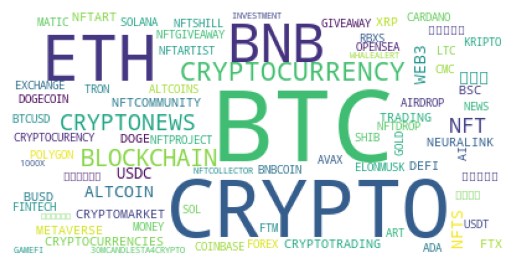

In [159]:
#tuples = [tuple(x) for x in df.values]
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequent_tags)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## frequency graph

C:\Users\vishwang.dave\AppData\Local\Temp\ipykernel_22584\947550632.py:5: UserWarning: Glyph 12499 (\N{KATAKANA LETTER BI}) missing from current font.
  plt.savefig('most frequent tags.pdf',dpi=300)
C:\Users\vishwang.dave\AppData\Local\Temp\ipykernel_22584\947550632.py:5: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  plt.savefig('most frequent tags.pdf',dpi=300)
C:\Users\vishwang.dave\AppData\Local\Temp\ipykernel_22584\947550632.py:5: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.savefig('most frequent tags.pdf',dpi=300)
C:\Users\vishwang.dave\AppData\Local\Temp\ipykernel_22584\947550632.py:5: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  plt.savefig('most frequent tags.pdf',dpi=300)
C:\Users\vishwang.dave\AppData\Local\Temp\ipykernel_22584\947550632.py:5: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  plt.savefig('most frequent tags.pdf',dpi=300)


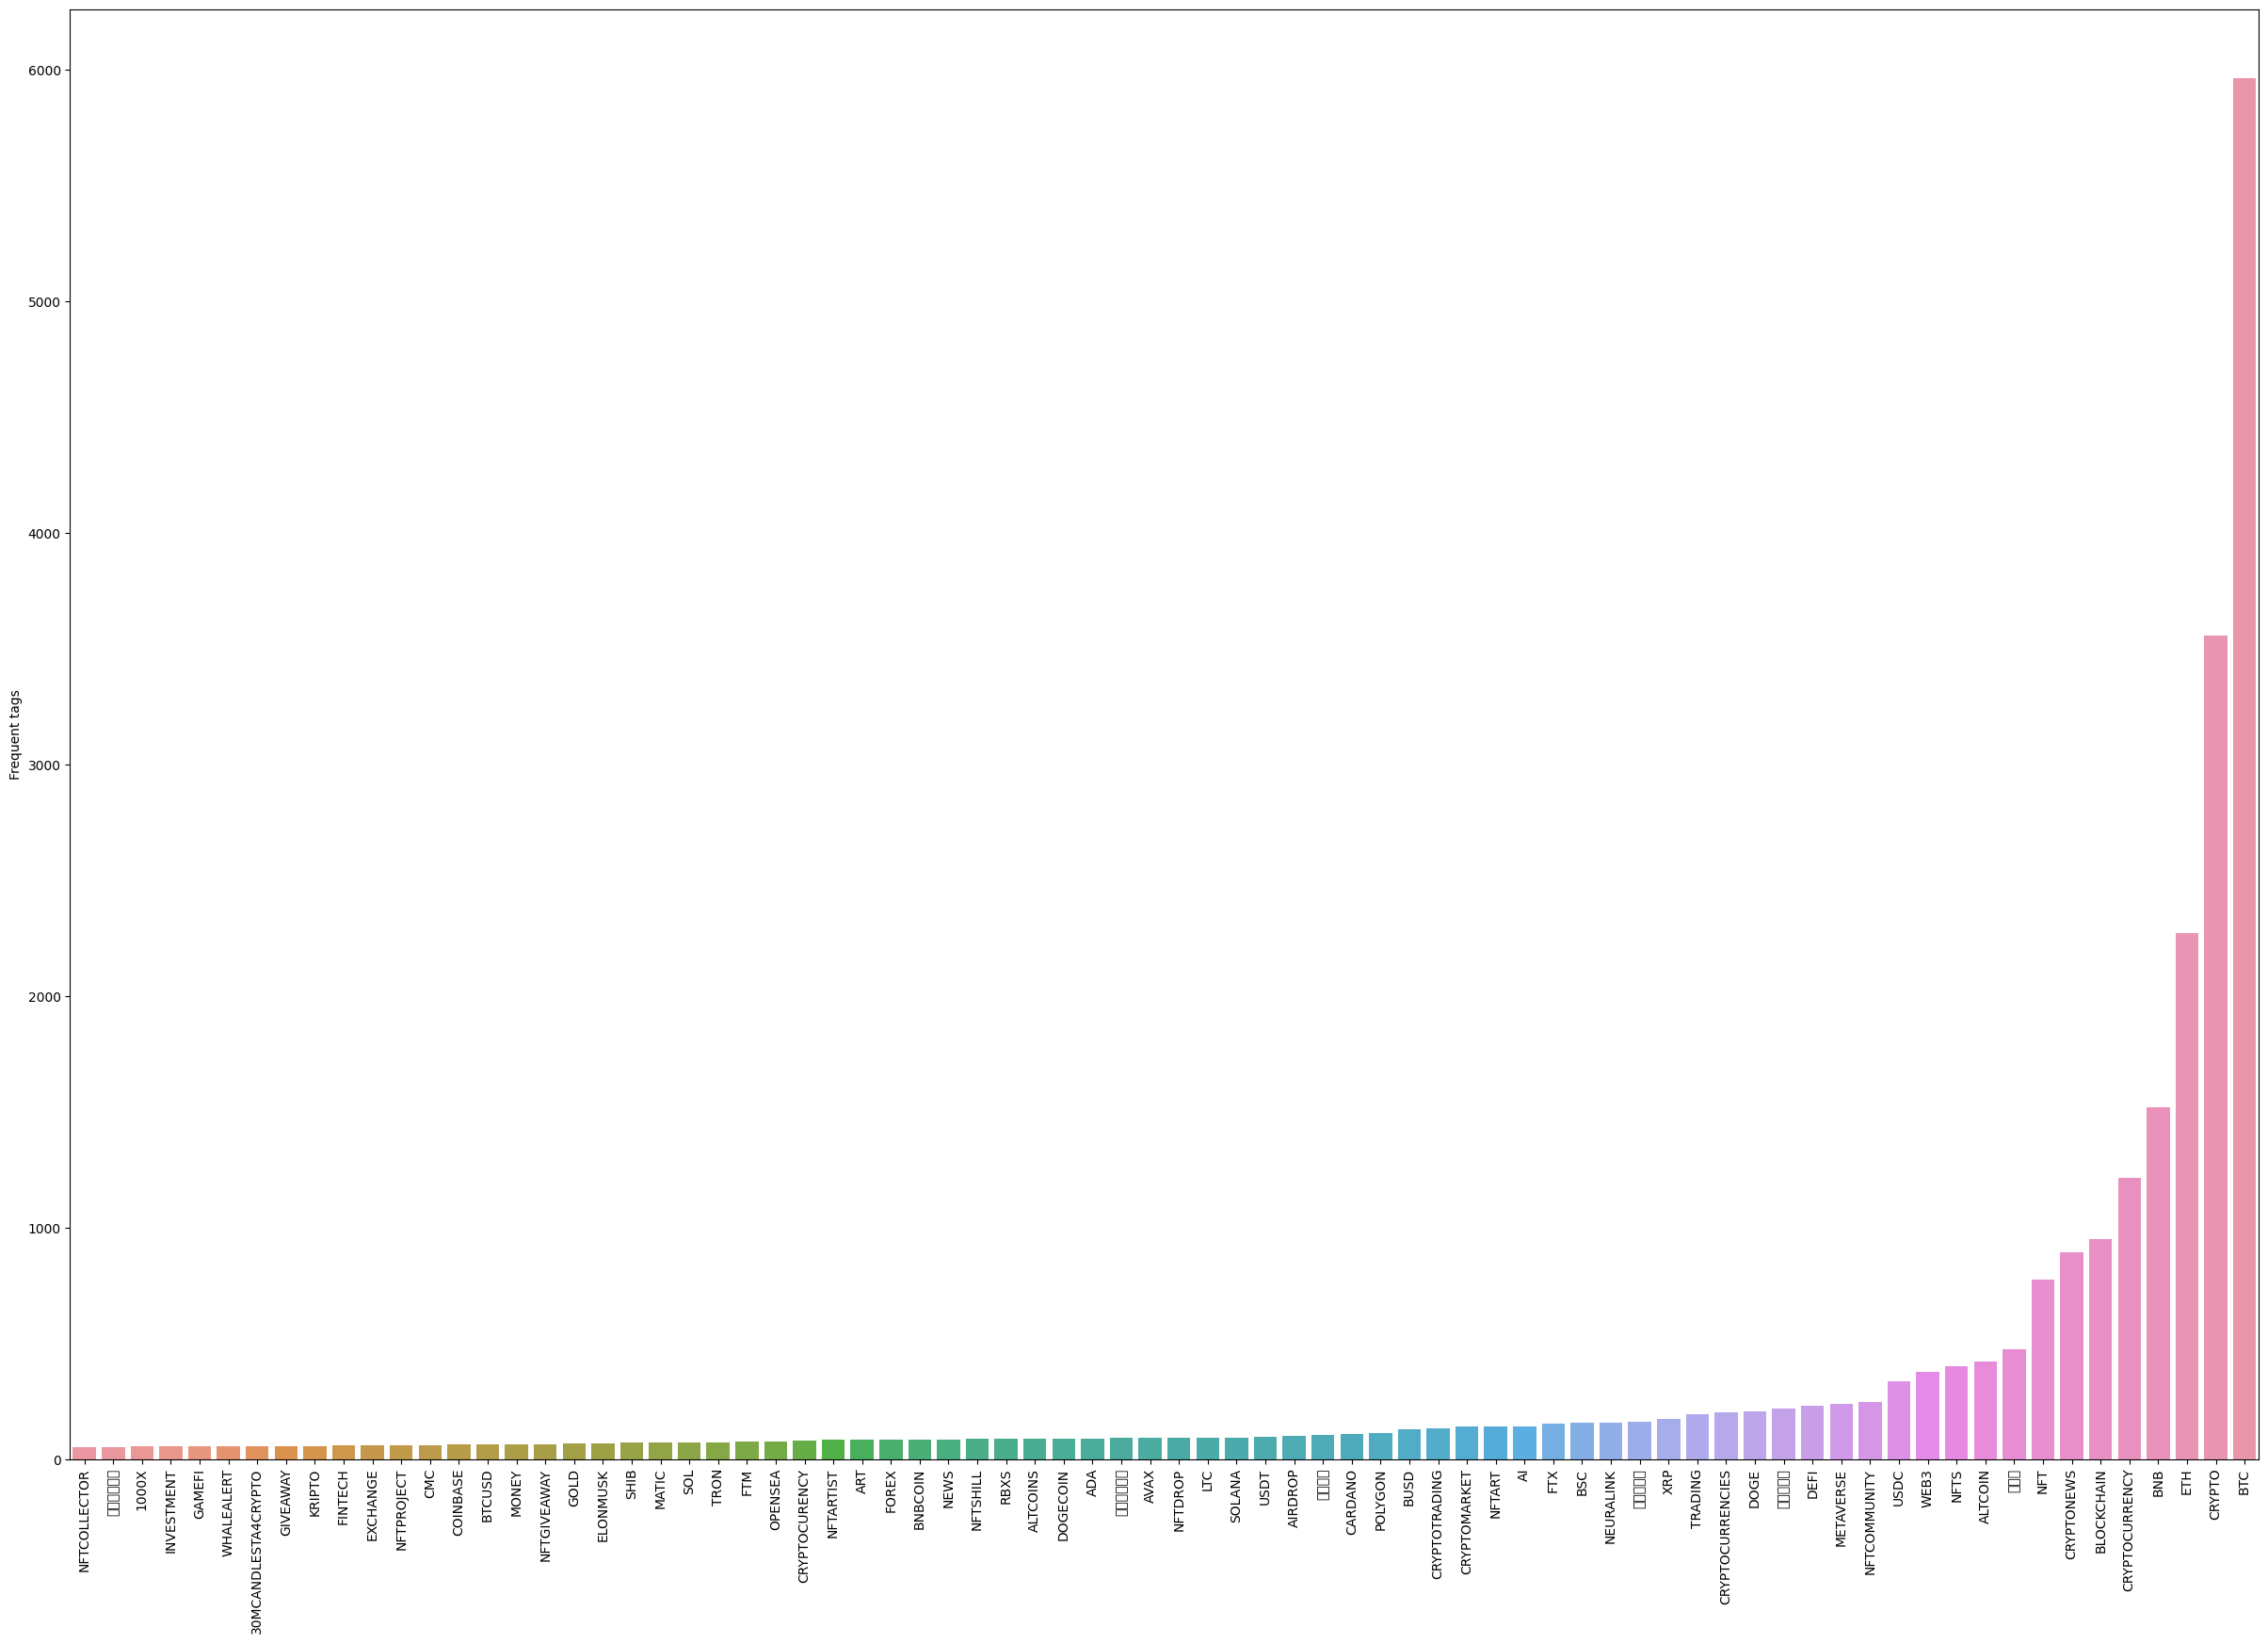

In [179]:
df = pd.DataFrame(frequent_tags.values(),frequent_tags.keys(),columns=['Frequent tags']).sort_values('Frequent tags')
plt.figure(figsize=(30,20))
sns.barplot(data=df.iloc[:20,:],x=df.index,y=df['Frequent tags'])
plt.xticks(rotation=90)
plt.savefig('most frequent tags.pdf',dpi=300)

<Figure size 640x480 with 0 Axes>

In [25]:
del final_count[None]

In [26]:
final_count

Counter({" 'NFT'": 1522,
         " 'DEFI'": 471,
         " 'CRV'": 22,
         " 'BTT'": 8,
         " 'BCH'": 108,
         " 'DAO'": 60,
         " 'APE'": 62,
         " 'VOLTINU'": 3,
         " 'SOLANAGIVEAWAY'": 12,
         " 'CRYPTO'": 5839,
         " 'BONE'": 10,
         " 'AVALANCHE'": 13,
         " 'CPI'": 13,
         " 'COIN'": 40,
         " 'WAGMI'": 12,
         " 'DOMAINFORSALE'": 5,
         " '美聯儲'": 2,
         " 'USDT'": 180,
         " 'USA'": 10,
         " 'IXP'": 2,
         " 'OTKAR'": 2,
         " 'MANA'": 19,
         " 'STARTUP'": 44,
         " '區塊鏈'": 13,
         " 'CHZ'": 20,
         " 'US'": 7,
         " 'LUNC'": 63,
         " 'OPTIMISM'": 6,
         " 'SNICA'": 3,
         " 'USD'": 33,
         " 'ALGO'": 19,
         " 'BUSINESS'": 100,
         " 'FINANCE'": 66,
         " '加密貨幣'": 6,
         " 'ADA'": 225,
         " 'CISO'": 2,
         " 'AMERICA'": 6,
         " 'SHIBA'": 88,
         " 'DYDX'": 4,
         " 'BTC'": 7144,
         

In [28]:
len(final_count.keys())

6507